### Load libraries

In [44]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.multivariate.manova import MANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

In [45]:
data = pd.read_excel('data.xlsx', sheet_name = 'combined')

# Calculation of survival rate
data['SurvivalRate'] = data['StandingPlants']/10*100
data.head()

,Location,Irrigation,Manure,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,StandingPlants,SurvivalRate
0,Bajo,I1,M1,1,21.887500,7.625,7.855000,51.25,4.0,40.0
1,Bajo,I1,M2,1,28.500000,9.625,10.432500,81.75,4.0,40.0
2,Bajo,I1,M3,1,20.916667,6.000,6.233333,25.00,3.0,30.0
3,Bajo,I1,M4,1,39.850000,11.500,16.272000,90.60,10.0,100.0
4,Bajo,I2,M1,1,39.850000,11.500,18.272000,123.00,10.0,100.0


In [46]:
# Fresh Yield Calculations (ton/acre)
data['FreshPlot'] = data['FreshWeight'] * data['StandingPlants']
data['FreshYield'] = (data['FreshPlot']/2*4047)/1000000

In [47]:
data.head()

,Location,Irrigation,Manure,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,StandingPlants,SurvivalRate,FreshPlot,FreshYield
0,Bajo,I1,M1,1,21.887500,7.625,7.855000,51.25,4.0,40.0,205.0,0.414818
1,Bajo,I1,M2,1,28.500000,9.625,10.432500,81.75,4.0,40.0,327.0,0.661685
2,Bajo,I1,M3,1,20.916667,6.000,6.233333,25.00,3.0,30.0,75.0,0.151762
3,Bajo,I1,M4,1,39.850000,11.500,16.272000,90.60,10.0,100.0,906.0,1.833291
4,Bajo,I2,M1,1,39.850000,11.500,18.272000,123.00,10.0,100.0,1230.0,2.488905


In [48]:
#Descriptive statistics of the whole dataset
data.describe()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,StandingPlants,SurvivalRate,FreshPlot,FreshYield
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2.000000,46.388899,8.823415,10.660878,90.517863,6.516204,65.162037,635.175154,1.285277
std,0.819346,17.970668,2.634764,3.699047,67.872401,3.089403,30.894034,657.692144,1.330840
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,1.000000,32.755000,7.000000,8.611000,40.100000,4.000000,40.000000,203.200000,0.411175
50%,2.000000,43.900000,8.400000,10.325000,75.125000,7.000000,70.000000,346.400000,0.700940
75%,3.000000,57.466667,10.381250,13.379500,122.812500,10.000000,100.000000,915.400000,1.852312
max,3.000000,101.400000,20.400000,23.580000,336.600000,10.000000,100.000000,3366.000000,6.811101


In [49]:
## Mean of variables between loactions/stuidy sites
data.groupby(['Location']).mean()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,StandingPlants,SurvivalRate,FreshPlot,FreshYield
Location,,,,,,,,,
Bajo,2.0,32.926488,10.737954,12.421478,116.333102,5.715278,57.152778,697.712963,1.411822
Wengkhar,2.0,56.001840,8.429514,10.872240,117.393403,7.270833,72.708333,949.187500,1.920681
Yusipang,2.0,50.238368,7.302778,8.688917,37.827083,6.562500,65.625000,258.625000,0.523328


In [50]:
# Multivariate Analysis of Variance
mnov = MANOVA.from_formula('PlantHeight + StemDiameter + StemsPerPlant + FreshYield ~ Location', data)
print(mnov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0815 4.0000 138.0000 389.0531 0.0000
         Pillai's trace  0.9185 4.0000 138.0000 389.0531 0.0000
 Hotelling-Lawley trace 11.2769 4.0000 138.0000 389.0531 0.0000
    Roy's greatest root 11.2769 4.0000 138.0000 389.0531 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Location        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.1842 8.0000 276.0000  45.8795 0.0000
          Pillai's trace 0.9936 8.0000 278.0000  34.3097 0.

In [51]:
# POST HOC ANALYSIS
X = data[['PlantHeight', 'StemDiameter', 'StemsPerPlant', 'FreshYield']]
y = data['Location']

post_hoc = lda().fit(X = X, y = y)

# Get Prior Probabilities of groups
post_hoc.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [52]:
# Get group means
post_hoc.means_

array([[32.92648843, 12.42147801, 10.7379537 ,  1.41182218],
       [56.00184028, 10.87223958,  8.42951389,  1.92068091],
       [50.23836806,  8.68891667,  7.30277778,  0.52332769]])

In [53]:
# Get coefficient of Linear Discriminants
post_hoc.scalings_

array([[-0.10657921,  0.02145901],
       [ 0.12867055, -0.10322389],
       [ 0.39974655,  0.37563641],
       [ 0.31065495, -1.18143963]])

In [54]:
# Get proportion of trace (Variance explained by each of the selected components)
post_hoc.explained_variance_ratio_

array([0.91168937, 0.08831063])

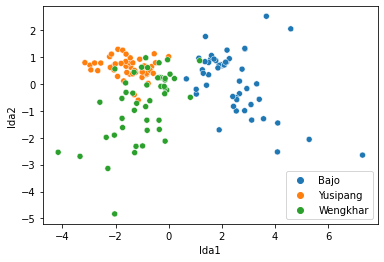

In [55]:
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=['lda1', 'lda2'])
X_new['location'] = data['Location']
sns.scatterplot(data = X_new, x = 'lda1', y = 'lda2', hue = data.Location.tolist())
plt.show()

In [58]:
import plotly.express as px
px.scatter(data_frame= X_new, x = 'lda1', y = 'lda2', color=data.Location.tolist())

In [56]:
rp.summary_cont(data['FreshYield'].groupby(data['Location']))

,N,Mean,SD,SE,95% Conf.,Interval
Location,,,,,,
Bajo,48,1.4118,1.2696,0.1833,1.0432,1.7805
Wengkhar,48,1.9207,1.6311,0.2354,1.4471,2.3943
Yusipang,48,0.5233,0.3079,0.0444,0.4339,0.6127
